In [1]:
import pandas as pd
import numpy as np

ny_path = "/home/fuest/EnData/data/pecanstreet/15minute_data_newyork.csv"
austin_path = "/home/fuest/EnData/data/pecanstreet/15minute_data_austin.csv"
cali_path = "/home/fuest/EnData/data/pecanstreet/15minute_data_california.csv"

ny_data = pd.read_csv(ny_path)
austin_data = pd.read_csv(austin_path)
cali_data = pd.read_csv(cali_path)

ny_user_ids = ny_data.dataid.unique().tolist()
austin_user_ids = austin_data.dataid.unique().tolist()
cali_user_ids = cali_data.dataid.unique().tolist()

In [2]:
cali_user_ids + austin_user_ids + ny_user_ids

[3687,
 6377,
 7062,
 8574,
 9213,
 203,
 1450,
 1524,
 2606,
 3864,
 7114,
 1731,
 4495,
 8342,
 3938,
 5938,
 8061,
 9775,
 4934,
 8733,
 9612,
 9836,
 6547,
 661,
 1642,
 2335,
 2361,
 2818,
 3039,
 3456,
 3538,
 4031,
 4373,
 4767,
 5746,
 6139,
 7536,
 7719,
 7800,
 7901,
 7951,
 8156,
 8386,
 8565,
 9019,
 9160,
 9922,
 9278,
 4550,
 558,
 2358,
 3700,
 1417,
 5679,
 5058,
 2318,
 5997,
 950,
 5982,
 5587,
 1222,
 387,
 3000,
 4283,
 3488,
 3517,
 9053,
 3996,
 27,
 142,
 914,
 2096,
 1240]

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import itertools
from data_utils.dataset import PecanStreetDataset

def plot_grid_profile(df, month, weekday):
    # Filter the DataFrame based on the specified month and weekday
    filtered_df = df[(df['month'] == month) & (df['weekday'] == weekday)]
    
    # Check if there are any rows after filtering
    if filtered_df.empty:
        print(f"No data available for month {month} and weekday {weekday}.")
        return

    # Convert the 'grid' column to a list of arrays
    grid_values = filtered_df['grid'].apply(np.array).values

    # Calculate the average grid values for each 15-minute interval across all filtered rows
    averaged_grid = np.mean(np.vstack(grid_values), axis=0)

    # Generate 96 timestamps for a day at 15-minute intervals
    timestamps = pd.date_range(start='00:00', end='23:45', freq='15T').strftime('%H:%M')

    # Ensure that the lengths match
    if len(averaged_grid) != len(timestamps):
        raise ValueError(f"Length of averaged_grid ({len(averaged_grid)}) does not match length of timestamps ({len(timestamps)}).")

    # Plot the averaged grid profile
    plt.figure(figsize=(12, 6))
    plt.plot(timestamps, averaged_grid, marker='o')
    plt.title(f'Grid Profile for Month {month} and Weekday {weekday}')
    plt.xlabel('Time of Day')
    plt.ylabel('Grid Values')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

df = PecanStreetDataset(normalize=False).data
plot_grid_profile(df, month=5, weekday=3)

/tmp/ipykernel_219366/949370180.py:51: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


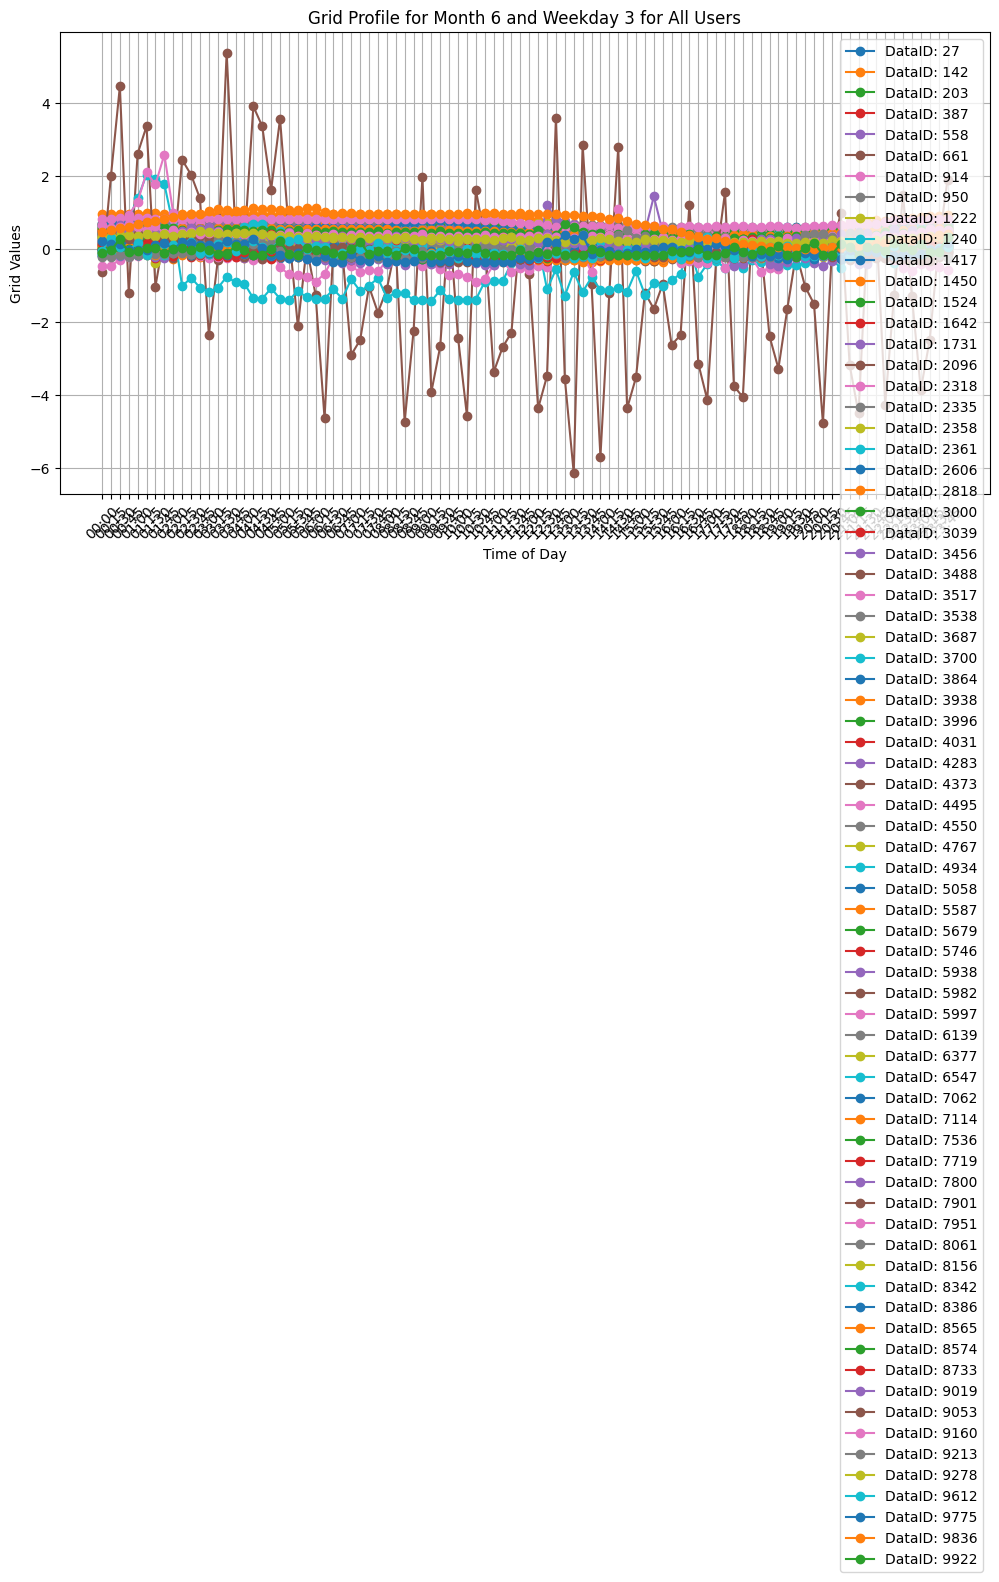

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from data_utils.dataset import PecanStreetDataset

def plot_grid_profile(df, month, weekday, dataid=None, ax=None):
    filtered_df = df[(df['month'] == month) & (df['weekday'] == weekday)]
    if dataid is not None:
        filtered_df = filtered_df[filtered_df['dataid'] == dataid]
    
    if filtered_df.empty:
        print(f"No data available for month {month} and weekday {weekday} with dataid {dataid}.")
        return

    grid_values = filtered_df['grid'].apply(np.array).values
    averaged_grid = np.mean(np.vstack(grid_values), axis=0)
    timestamps = pd.date_range(start='00:00', end='23:45', freq='15T').strftime('%H:%M')

    if len(averaged_grid) != len(timestamps):
        raise ValueError(f"Length of averaged_grid ({len(averaged_grid)}) does not match length of timestamps ({len(timestamps)}).")
    
    if ax is None:
        plt.figure(figsize=(12, 6))
        plt.plot(timestamps, averaged_grid, marker='o')
        title = f'Grid Profile for Month {month} and Weekday {weekday}'
        if dataid is not None:
            title += f' (DataID: {dataid})'
        plt.title(title)
        plt.xlabel('Time of Day')
        plt.ylabel('Grid Values')
        plt.xticks(rotation=45)
        plt.grid(True)
        plt.tight_layout()
        plt.show()
    else:
        ax.plot(timestamps, averaged_grid, marker='o', label=f'DataID: {dataid}')

def plot_all_users_grid_profile(df, month, weekday):
    unique_dataids = df['dataid'].unique()
    fig, ax = plt.subplots(figsize=(12, 6))
    for dataid in unique_dataids:
        plot_grid_profile(df, month, weekday, dataid, ax=ax)
    
    title = f'Grid Profile for Month {month} and Weekday {weekday} for All Users'
    plt.title(title)
    plt.xlabel('Time of Day')
    plt.ylabel('Grid Values')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

df = PecanStreetDataset(normalize=True).data
plot_all_users_grid_profile(df, month=6, weekday=3)

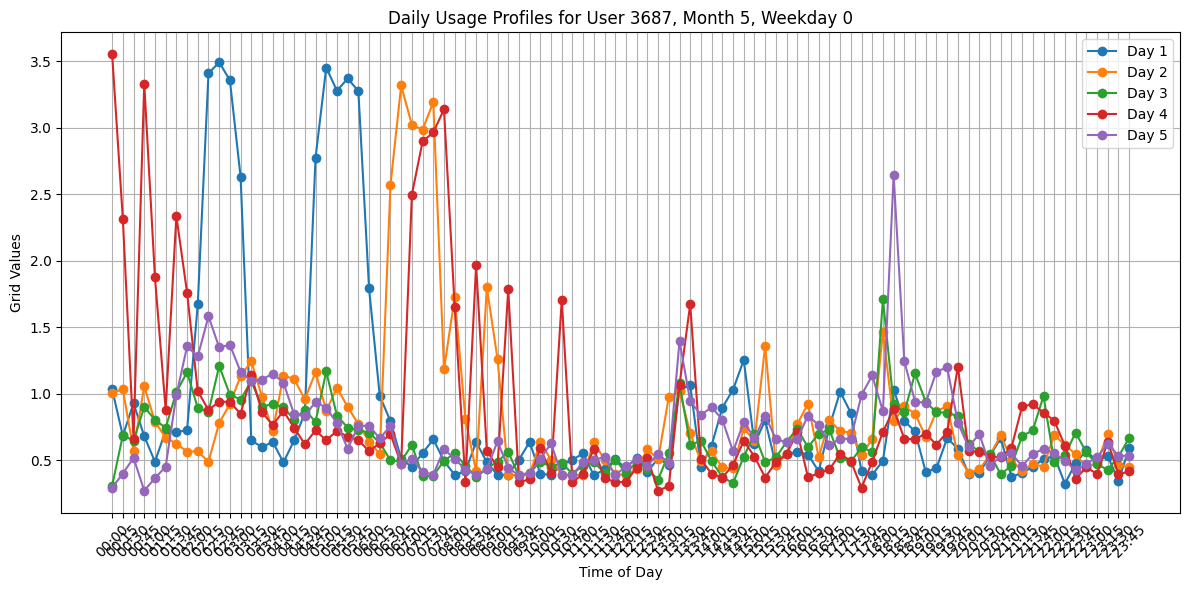

In [5]:
def plot_daily_usage_profiles(df, dataid, month, weekday):
    # Filter the DataFrame based on the specified user id, month, and weekday
    filtered_df = df[(df['dataid'] == dataid) & (df['month'] == month) & (df['weekday'] == weekday)]
    
    # Check if there are any rows after filtering
    if filtered_df.empty:
        print(f"No data available for user {dataid}, month {month}, and weekday {weekday}.")
        return

    grid_values = filtered_df['grid'].apply(np.array).values
    timestamps = pd.date_range(start='00:00', end='23:45', freq='15T').strftime('%H:%M')

    plt.figure(figsize=(12, 6))
    for i, daily_grid in enumerate(grid_values):
        plt.plot(timestamps, daily_grid, marker='o', label=f'Day {i+1}')

    title = f'Daily Usage Profiles for User {dataid}, Month {month}, Weekday {weekday}'
    plt.title(title)
    plt.xlabel('Time of Day')
    plt.ylabel('Grid Values')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

df = PecanStreetDataset(normalize=False).data
plot_daily_usage_profiles(df, dataid=3687, month=5, weekday=0)

In [ ]:
import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt

from data_utils.dataset import PecanStreetDataset, prepare_dataloader, split_dataset
from generator.acgan import ACGAN  

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

data = PecanStreetDataset(normalize=True, user_id=27)
train_dataset, val_dataset = split_dataset(data)
model = ACGAN(
    input_dim=1,
    noise_dim=512,
    embedding_dim=512,
    output_dim=96,
    learning_rate=1e-4,
    weight_path="runs/",
)
model.train(train_dataset, val_dataset, batch_size=32, num_epoch=100)

def generate_and_plot_series(model, day_labels, month_labels, data, month, weekday):
    series1 = model.generate([day_labels, month_labels]).squeeze()
    series2 = model.generate([day_labels, month_labels]).squeeze()
    series3 = model.generate([day_labels, month_labels]).squeeze()

    timestamps = pd.date_range(start='00:00', periods=96, freq='15T').strftime('%H:%M')

    filtered_data = data[(data['month'] == month) & (data['weekday'] == weekday)]
    real_profiles = filtered_data.sample(3)['grid'].values
    real_profile1 = np.array(real_profiles[0])
    real_profile2 = np.array(real_profiles[1])
    real_profile3 = np.array(real_profiles[2])

    # Plot all series on the same plot
    plt.figure(figsize=(15, 6))
    plt.plot(timestamps, series1, label='Generated Profile 1')
    plt.plot(timestamps, series2, label='Generated Profile 2')
    plt.plot(timestamps, series3, label='Generated Profile 3')
    plt.plot(timestamps, real_profile1, label='Real Profile 1', linestyle='--')
    plt.plot(timestamps, real_profile2, label='Real Profile 2', linestyle='--')
    plt.plot(timestamps, real_profile3, label='Real Profile 3', linestyle='--')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.title('Generated and Real Time Series Profiles')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

day_labels = torch.tensor([6]).to(device)
month_labels = torch.tensor([5]).to(device)

generate_and_plot_series(model, day_labels, month_labels, data.data, 5, 6)

In [ ]:
import pandas as pd
import torch
import numpy as np
import matplotlib.pyplot as plt

from generator.acgan import ACGAN  
from data_utils.dataset import PecanStreetDataset, split_dataset

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def plot_range_with_values(df, colname, values_to_compare):
    values_to_compare = values_to_compare
    filtered_df =df
    array_data = np.array(filtered_df[colname].to_list())
    min_values = np.min(array_data, axis=0)
    max_values = np.max(array_data, axis=0)
    timestamps = pd.date_range(start='00:00', end='23:45', freq='15T').strftime('%H:%M')
    
    plt.figure(figsize=(15, 7))
    plt.fill_between(timestamps, min_values, max_values, color='gray', alpha=0.5, label='Range of values')
    plt.plot(timestamps, values_to_compare, color='blue', marker='o', label='Values to Compare')
    
    plt.title('Range of Values and Comparison')
    plt.xlabel('Time of Day')
    plt.ylabel('Values')
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

In [7]:
from data_utils.dataset import PecanStreetDataset, PecanStreetUserDataset

normalized_dataset = PecanStreetDataset(normalize=True, include_generation=True)
normalized_dataset.data

ZeroDivisionError: float division by zero

In [ ]:
import pandas as pd
import numpy as np

from data_utils.dataset import PecanStreetDataset, prepare_dataloader, split_dataset
from eval.metrics import (
    Context_FID,
    calculate_period_bound_mse,
    dynamic_time_warping_dist,
)
from generator.acgan import ACGAN

data = PecanStreetDataset(normalize=True, user_id=661, include_generation=True, threshold=(-2, 2))
train_dataset, val_dataset = split_dataset(data)
model = ACGAN(
    input_dim=1,
    noise_dim=1,
    embedding_dim=512,
    window_length=96,
    learning_rate=5e-4,
    weight_path="runs/",
)
model.train(train_dataset, val_dataset, batch_size=32, num_epoch=100)

_, _, syn_ts_df = model.generate_data_for_eval(data.data)
unnormalized_syn = data.inverse_transform(syn_ts_df, 661, 'grid')
unnormalized_ori = data.inverse_transform(data.data, 661, 'grid')
syn = np.expand_dims(np.array(unnormalized_syn["grid"].tolist()), axis=-1)
ori = np.expand_dims(np.array(unnormalized_ori["grid"].tolist()), axis=-1)

#print(f"Context FID: {Context_FID(ori, syn)}")
#print(f"Dynamic Time Warping Distance: {dynamic_time_warping_dist(ori, syn)}")
#print(
#    f"Period bound MSE: {calculate_period_bound_mse(timeseries_array=syn, df=data.data, timeseries_colname='grid')}"
#)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def plot_long_sequence(df, colname, syn):
    # Flatten the syn array to shape (353, 96)
    syn = syn.squeeze()

    # Create a long sequence of real values by concatenating all values in the 'grid' column
    real_values = np.concatenate(df[colname].to_list())

    # Create a long sequence of synthetic values by concatenating along the 0th axis
    syn_values = syn.flatten()

    # Generate indices for the x-axis
    real_indices = np.arange(len(real_values))
    syn_indices = np.arange(len(syn_values))

    plt.figure(figsize=(15, 7))
    plt.plot(real_indices, real_values, color='gray', alpha=0.5, label='Real values')
    plt.plot(syn_indices, syn_values, color='blue', marker='o', markersize=1, linestyle='-', label='Synthetic values')

    plt.title('Real Values and Synthetic Data Comparison')
    plt.xlabel('Time Index')
    plt.ylabel('Values')
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_long_sequence(unnormalized_ori, 'grid', syn)


In [ ]:
def plot_range_with_syn_values(df, colname, syn_df, month, weekday):
    # Filter the DataFrame for the given month and weekday
    filtered_df = df[(df['month'] == month) & (df['weekday'] == weekday)]
    
    # Ensure there is data for the given month and weekday
    if filtered_df.empty:
        print(f"No data for month={month}, weekday={weekday}")
        return
    
    # Convert the 'grid' column to a numpy array
    array_data = np.array(filtered_df[colname].to_list())

    # Calculate min and max values across all rows
    min_values = np.min(array_data, axis=0)
    max_values = np.max(array_data, axis=0)

    # Ensure the synthetic data DataFrame has the same structure and filter it
    syn_filtered_df = syn_df[(syn_df['month'] == month) & (syn_df['weekday'] == weekday)]

    # Ensure there is synthetic data for the given month and weekday
    if syn_filtered_df.empty:
        print(f"No synthetic data for month={month}, weekday={weekday}")
        return

    syn_values = np.array(syn_filtered_df['grid'].to_list()).squeeze()

    # Generate timestamps for the x-axis
    timestamps = pd.date_range(start='00:00', end='23:45', freq='15T').strftime('%H:%M')

    plt.figure(figsize=(15, 7))
    plt.fill_between(timestamps, min_values, max_values, color='gray', alpha=0.5, label='Range of values')
    
    # Plot the synthetic time series
    plt.plot(timestamps, syn_values[2], color='blue', marker='o', markersize=2, linestyle='-', label='Synthetic values')

    plt.title(f'Range of Values and Synthetic Data Comparison for Month={month}, Weekday={weekday}')
    plt.xlabel('Time of Day')
    plt.ylabel('Values')
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

In [ ]:
plot_range_with_syn_values(unnormalized_ori, 'grid', unnormalized_syn, 10, 4)

In [ ]:
from sklearn.metrics import mean_squared_error
from data_utils.dataset import PecanStreetDataset, split_dataset
import pandas as pd
import numpy as np

def check_inverse_transform(normalized_dataset, unnormalized_dataset):
    normalized_df = normalized_dataset.data
    unnormalized_df = unnormalized_dataset.data
    transformed = normalized_dataset.inverse_transform(normalized_df)

    mse_list = []

    for idx in range(len(unnormalized_df)):
        unnormalized_timeseries = unnormalized_df.iloc[idx]["timeseries"]
        transformed_timeseries = transformed.iloc[idx]["timeseries"]

        # Ensure the arrays have the same shape
        assert unnormalized_timeseries.shape == transformed_timeseries.shape, "Shape mismatch between transformed and unnormalized timeseries"

        # Calculate the MSE for this row
        mse = mean_squared_error(unnormalized_timeseries, transformed_timeseries)
        mse_list.append(mse)

    # Calculate the average MSE over all rows
    avg_mse = np.mean(mse_list)

    print(f"Average MSE over all rows: {avg_mse}")
    return avg_mse

check_inverse_transform(661)

In [ ]:

USER_IDs = [27,  142,  203,  387,  558,  661,  914,  950, 1222, 1240, 1417,
       1450, 1524, 1642, 1731, 2096, 2318, 2335, 2358, 2361, 2606, 2818,
       3000, 3039, 3456, 3488, 3517, 3538, 3687, 3700, 3864, 3938, 3996,
       4031, 4283, 4373, 4495, 4550, 4767, 4934, 5058, 5587, 5679, 5746,
       5938, 5982, 5997, 6139, 6377, 6547, 7062, 7114, 7536, 7719, 7800,
       7901, 7951, 8061, 8156, 8342, 8386, 8565, 8574, 8733, 9019, 9053,
       9160, 9213, 9278, 9612, 9775, 9836, 9922]
